# Assignment 4
## Raja Jain | 2022-02-21

In [1]:
from pprint import pprint as pp

import docx
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sweetviz as sv
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


def getText(filename):
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)
    return "\n".join(fullText)

In [2]:
text = getText("Assignment 4 - KNN.docx")
print(text)

COMP 4448: Data Science Tools II						          Assignment 4
Directions: Do this assignment in Jupyter Notebook and provide screenshots of code and output in this word document wherever required. You will upload this word document containing screenshots of code and answers as well as your Jupyter Notebook to Canvas. All assignments will be submitted and graded through canvas and grades will be transferred to the 2U platform. 
Goal: The goal of this assignment is to give you the opportunity to implement K-NN from scratch as well as using tools built into sklearn. You would also compare your algorithms with other algorithms. 
Packages: Core packages you may need for this assignment include numpy, pandas, sklearn, matplotlib.pyplot and/or seaborn.  


Question 1
Read the data provided on canvas into Python as follows: 

Print the first 5 rows of each dataset to inspect the nature of data


Split the data into training and test set as follows:
Print the shape of input and output data for t

In [3]:
# Question 1
# Read the data provided on canvas into Python as follows:
delivery_train = pd.read_csv("delivery_time_train_data.csv")
delivery_test = pd.read_csv("delivery_time_test_data.csv")
student_train = pd.read_csv("student_train_data.csv")
student_test = pd.read_csv("student_test_data.csv")

# Print the first 5 rows of each dataset to inspect the nature of data
for data in [delivery_train, delivery_test, student_train, student_test]:
    print(data.head())

   Miles  Deliveries  Time
0    100           4   9.3
1     50           3   4.8
2    100           4   8.9
3    100           2   6.5
4     50           2   4.2
   Miles  Deliveries  Time
0     50           3   4.6
1     65           2   5.5
2     80           1   6.3
3     70           1   6.2
4     70           5   8.5
    GPA  Age  Dropped
0  3.78   21        0
1  2.38   27        0
2  3.05   21        1
3  2.19   28        1
4  3.22   23        0
    GPA  Age  Dropped
0  2.49   26        1
1  2.67   29        0
2  2.86   29        1
3  2.21   26        0
4  2.91   20        1


In [4]:
# Split the data into training and test set:
# Print the shape of input and output data for the training and test sets
X_delivery_train = delivery_train[["Miles", "Deliveries"]]
y_delivery_train = delivery_train[["Time"]]

X_delivery_test = delivery_test[["Miles", "Deliveries"]]
y_delivery_test = delivery_test[["Time"]]

X_student_train = student_train[["GPA", "Age"]]
y_student_train = student_train[["Dropped"]]

X_student_test = student_test[["GPA", "Age"]]
y_student_test = student_test[["Dropped"]]

for data in [
    X_delivery_train,
    y_delivery_train,
    X_delivery_test,
    y_delivery_test,
    X_student_train,
    y_student_train,
    X_student_test,
    y_student_test,
]:
    print(data.shape)

(199, 2)
(199, 1)
(101, 2)
(101, 1)
(400, 2)
(400, 1)
(100, 2)
(100, 1)


In [5]:
# You would use the delivery data for regression: that is, miles (“Miles”) and number of deliveries (“Deliveries”) would be use an input to predict the total time it takes for a delivery truck to deliver Amazon packages. You would write a k-nearest neighbor algorithm function that learns from the training set and predicts the output or y values of given test instances. The input that the function takes include:
# X_train: Pandas DataFrame or 2D NumPy array
#  y_train: Pandas Series or 1D NumPy array
# X_test: Pandas DataFrame or 2D NumPy array
# K: the number of nearest neighbors. The default value should be k=5 if no k value is passed during function call.
# Use the following pseudo code to implement the algorithm (also see class notes on ideas for writing knn from scratch to see the details of each step in the body of the code). Here is the pseudo code:


def knn_predict(X_train, y_train, X_test, k=5):
    y_pred = []
    for i in range(len(X_test)):
        # grab a test instance from the X_test data
        test_instance = np.array([X_test.iloc[i]])
        # find distances betweent the test instance and all the training instances
        d = metrics.euclidean_distances(X_train, test_instance)
        # stack the distances between the y_train to get a matrix
        stacked = np.stack((y_train.Time.values, d.flatten()), axis=1)
        # sort the matrix by the distance column
        sorted_stack = stacked[np.argsort(stacked[:, -1])]
        # pick k number of y train values
        ## where k is much less than the length of the training set
        y_train_nearest_k = sorted_stack[:k, 0]
        # make a prediction for the test instance
        prediction = y_train_nearest_k.mean()
        # append the predicted value to the y_pred variable
        y_pred.append(prediction)

    # return the list of y_pred corresponding to the test instances in the test set
    return y_pred


# Call the knn_predict() function and pass the X_delivery_train, y_delivery_train and X_delivery_test to compute the predicted output values for the X_delivery_test set. You can reference the results using a variable, y_delivery_test_pred.
y_delivery_test_pred = knn_predict(X_delivery_train, y_delivery_train, X_delivery_test)

# Write a function that computes the mean squared error to measure the performance accuracy of your knn algorithm. The input that goes into the function is the actual output values(y) and the predicted output values (y_pred). The mean squared error (mse) is calculated as follows:
def mse(y, y_pred):
    return np.mean((y - y_pred) ** 2)


# You can name the function mse. Then call the function to compute the mse for the test set for the delivery data. That is, use mse(y_delivery_test, y_delivery_test_pred).
mse(y_delivery_test.values, y_delivery_test_pred)

6.836912185079895

In [6]:
# Does your algorithm overfit the data? To answer this question, you need to compute the accuracy or mse of the algorithm on the training set, and compare with the accuracy or mse you got for the test set. You will need to start with making predictions for the training set. Note that you will need to pass the training set into the X_test parameter of the knn_predict() function, in addition to the other arguments of the function. When you get the predicted values for the training set, use the mse() function to get the training mse.
y_delivery_train_pred = knn_predict(
    X_delivery_train, y_delivery_train, X_delivery_train
)
mse(y_delivery_train.values, y_delivery_train_pred)

6.009555687987676

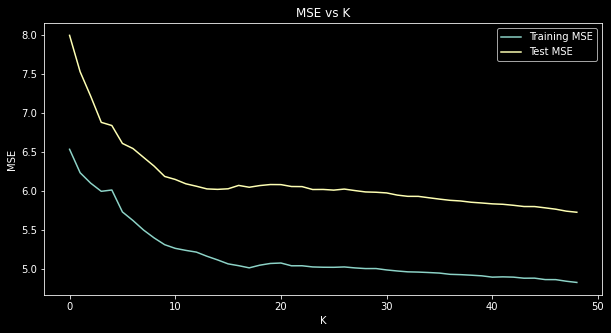

In [7]:
# Now, tune the hyperparameter, k, of your algorithm. Specify a grid of hyperparameter values from k=1 to k=50. Use a for-loop, then inside the for-loop body, use the knn_predict() function as well as the mse() function to compute the mse values for the training set and test set for different values of k in the hyperparameter grid. Plot the training and test error rates of the model versus the grid of hyperparameter values.
# Paste a screenshot of your code and output here
k_values = range(1, 50)
mse_test = []
mse_train = []

for k in k_values:
    y_test_pred = knn_predict(X_delivery_train, y_delivery_train, X_delivery_test, k)
    mse_test.append(mse(y_delivery_test.values, y_test_pred))

    y_train_pred = knn_predict(X_delivery_train, y_delivery_train, X_delivery_train, k)
    mse_train.append(mse(y_delivery_train.values, y_train_pred))

plt.figure(figsize=(10, 5))
plt.title("MSE vs K")
plt.xlabel("K")
plt.ylabel("MSE")
plt.plot(mse_train, label="Training MSE")
plt.plot(mse_test, label="Test MSE")
plt.legend()
plt.show()

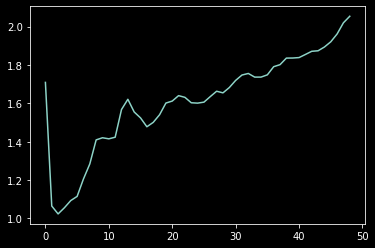

In [8]:
# Now, construct and fit a k-nearest neighbor model using the  KNeighborsRegressor() estimator in sklearn.neighbors module. Use the mean_square_error() function inside the sklearn.metrics module to compute the mse of the model on the test set.
model_mse = []
for k in k_values:
    reg = KNeighborsRegressor(n_neighbors=k)
    reg.fit(X_delivery_train, y_delivery_train)
    model_mse.append(
        metrics.mean_squared_error(y_delivery_test.values, reg.predict(X_delivery_test))
    )

plt.plot(model_mse, label="Model MSE")

K vs. MSE for values of K with lowest MSE
[(6, 0.8323681551828654), (8, 0.8341559711526709), (12, 0.834826879137618), (14, 0.8396712871287126), (15, 0.844426051980198)]


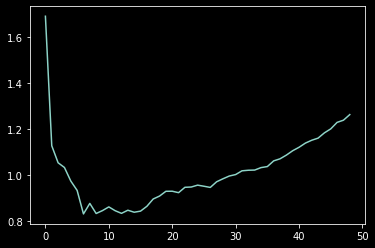

In [9]:
# Using the Pipeline constructor inside the sklearn.pipeline module, scale the X_delivery_train with the StandardScaler(), and also construct the KNeighborsRegressor() inside the Pipeline(). Then the call the fit() method on the pipeline object to fit the model into the delivery training data. Transform the X_delivery_test data using StandardScaler() and use the mean_squared_error () function inside the sklearn.metrics module to compute the mse of the model on the test set. Is this mse similar to the mse you got when you used the unscaled input data in (g) above?

model_mse = []
for k in k_values:
    pipeline = Pipeline(
        [("scaler", StandardScaler()), ("knn", KNeighborsRegressor(n_neighbors=k))]
    )

    pipeline.fit(X_delivery_train, y_delivery_train.values.ravel())
    model_mse.append(
        metrics.mean_squared_error(
            y_delivery_test.values, pipeline.predict(X_delivery_test)
        )
    )

plt.plot(model_mse, label="Model MSE")

print(f"K vs. MSE for values of K with lowest MSE")
print(sorted(list(enumerate(model_mse)), key=lambda x: x[1])[:5])

In [10]:
# Use the scaled X_delivery_train and X_delivery_test data and the RandomForestRegressor constructor inside the sklearn.ensemble module to construct/fit a random forest model, the compute the mse for this model. Is this mse similar to the one you got in question (h) above?
# Paste a screenshot of your code and output here
random_forest_pipeline = Pipeline(
    [("scaler", StandardScaler()), ("rf", RandomForestRegressor())]
)
random_forest_pipeline.fit(X_delivery_train, y_delivery_train.values.ravel())
metrics.mean_squared_error(
    y_delivery_test.values, random_forest_pipeline.predict(X_delivery_test)
)

0.973377963236261

In [11]:
# Question 2
# You would use the student data for classification: that is, GPA and Age would be used as input to predict wither a student will drop out of school (Dropped=1) or not drop (Dropped=0). You will write a k-nearest neighbor algorithm function that learns from the training set and classifies given test instances to class 0 or class 1. The input that the function takes include:
# X_train: Pandas DataFrame or 2D NumPy array
#  y_train: Pandas Series or 1D NumPy array
# X_test: Pandas DataFrame or 2D NumPy array
# K: the number of nearest neighbors. The default value should be k=5 if no k value is passed during function call.
# Use the following pseudo code to implement the algorithm (also see class notes on ideas for writing knn from scratch to see the details of each step in the body of the code). Here is the pseudo code:
def knn_predict(X_train, y_train, X_test, k=41):
    y_pred = []
    for i in range(len(X_test)):
        # grab a test instance from the X_test data
        if type(X_test) == np.ndarray:
            test_instance = np.array(X_test[i])
        else:
            test_instance = np.array([X_test.iloc[i]])
        # find distances betweent the test instance and all the training instances
        if type(X_test) == np.ndarray:
            d = metrics.euclidean_distances(X_train, [test_instance])
        else:
            d = metrics.euclidean_distances(X_train, test_instance)
        # stack the distances between the y_train to get a matrix
        stacked = np.stack((y_train.Dropped.values, d.flatten()), axis=1)
        # sort the matrix by the distance column
        sorted_stack = stacked[np.argsort(stacked[:, -1])]
        # pick k number of y train values
        ## where k is much less than the length of the training set
        y_train_nearest_k = [int(x) for x in sorted_stack[:k, 0]]
        # make a prediction for the test instance
        prediction = np.argmax(np.bincount(y_train_nearest_k))
        # append the predicted value to the y_pred variable
        y_pred.append(prediction)
    # return the list of y_pred corresponding to the test instances in the test set
    return y_pred


# Scale the X_student_train and X_student_test data, and pass these scaled data sets in addition to y_student_train data into the knn_predict() function call to compute the predicted output values for the X_student_test set. You can reference the results using a variable, y_student_test_pred.
# Paste a screenshot of your code and output here
X_student_train_scaled = StandardScaler().fit_transform(X_student_train)
X_student_test_scaled = StandardScaler().fit_transform(X_student_test)

y_student_test_pred = knn_predict(
    X_student_train_scaled, y_student_train, X_student_test_scaled
)
print(y_student_test_pred)

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [12]:
# b) Define a function called overall_accuracy, that computes the overall accuracy of your algorithm. You can let your function compare the actual values (y) and the predicted or classified y values (y_pred), for example: overall accuracy could be computed using mean(y==y_pred)
def overall_accuracy(actual: np.ndarray, predicted: np.ndarray):
    return np.mean(actual == predicted)


overall_accuracy(y_student_test.values, y_student_test_pred)

0.7484

In [13]:
# c) Use GridSearch in scikit learn to tune the parameter of the k-nearest neighbor classifier, then use that optimal parameter to compute the accuracy of the knn estimator on the test set. Is this accuracy score similar to that obtained using your knn algorithm from scratch?
grid = GridSearchCV(KNeighborsClassifier(), {"n_neighbors": range(1, 50)}, cv=5)
grid.fit(X_student_train_scaled, y_student_train.values.ravel())

overall_accuracy(y_student_test.values, grid.predict(X_student_test_scaled))

0.7484

In [14]:
# d) Also build another model using a random forest classifier and compute the accuracy score on the test set. Which of these models is the better, the model is question 2c or this model in question 2d? Why or why not?
rf_clf = RandomForestClassifier()
rf_clf.fit(X_student_train_scaled, y_student_train.values.ravel())
rf_clf_preds = rf_clf.predict(X_student_test_scaled)
overall_accuracy(y_student_test.values, rf_clf_preds)

0.6188

In [16]:
# Question 3: Your own mini project

# Find your own dataset suitable for classification or regression with at least three input variables and 200 or more cases: Depending on the target variable of interest, you would build a k-nearest neighbor classifier or regressor using the appropriate sklearn estimator. Find some interesting unique dataset that is not popularly used in the internet.

# Address the following and include code/output snippets from b) to f). Include the response under each sub question.
# State your research question

energy_efficiency = pd.read_excel(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx",
    names=[
        "relative_compactness",
        "surface_area",
        "wall_area",
        "roof_area",
        "overall_height",
        "orientation",
        "glazing_area",
        "glazing_area_distribution",
        "heating_load",
        "cooling_load",
    ],
)

print(energy_efficiency.info())

display(energy_efficiency.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   relative_compactness       768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   overall_height             768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   heating_load               768 non-null    float64
 9   cooling_load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB
None


,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [17]:
# Data pre-processing (to the extent deemed necessary: remember the knn algorithm depends on distances, so you need to rescale, normalize or standardize your input values to make sure no variable influences the predictions due to it scale).
energy_efficiency_scaled = StandardScaler().fit_transform(
    energy_efficiency.drop(columns=["heating_load", "cooling_load"])
)

In [22]:
# Data splitting
X_train, X_test, y_train, y_test = train_test_split(
    energy_efficiency_scaled,
    energy_efficiency["heating_load"],
    test_size=0.2,
    random_state=42,
)

for data in [X_train, X_test, y_train, y_test]:
    print(data.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [19]:
# Model construction
knn_clf = GridSearchCV(
    KNeighborsRegressor(),
    {
        "n_neighbors": range(5, 50),
        "weights": [
            "uniform",
            "distance",
        ],  # applies greater weight to the closest neighbors
        "leaf_size": range(30, 40),
        "p": [1, 2],  # manhattan vs euclidean distance
    },
    cv=10,
    n_jobs=-1,
)

# Hyperparameter turning (choose whatever approach your like)
knn_clf.fit(X_train, y_train.values)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'leaf_size': range(30, 40),
                         'n_neighbors': range(5, 50), 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [20]:
# Use the best or optimal parameter values to build a model, then compute the accuracy score for your estimator.
print("Best Estimator:\n", knn_clf.best_estimator_)

Best Estimator:
 KNeighborsRegressor(leaf_size=35, p=1, weights='distance')


In [21]:
# Discuss about overfitting for the model
print("Train Score", knn_clf.score(X_train, y_train))
print("Test Score:", knn_clf.score(X_test, y_test))

Train Score 1.0
Test Score: 0.9871177434504821
